# Classification

Classification is a type of supervised learning. It specifies the class to which data elements belong to and is best used when the output has finite and discrete values. It predicts a class for an input variable as well.

There are 2 types of Classification: 

- Binomial
- Multi-Class

##### This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.
The dataset can be donwloaded from [here](https://www.kaggle.com/shrutimechlearn/churn-modelling)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.ensemble import BaggingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

- Surname : The surname of the customer
- CreditScore : The credit score of the customer
- Geography : The country of the customer(Germany/France/Spain)
- Gender : The gender of the customer (Female/Male)
- Age : The age of the customer
- Tenure : The customer's number of years in the in the bank
- Balance : The customer's account balance
- NumOfProducts : The number of bank products that the customer uses
- HasCrCard : Does the customer has a card? (0=No,1=Yes)
- IsActiveMember : Does the customer has an active mebership (0=No,1=Yes)
- EstimatedSalary : The estimated salary of the customer
- Exited : Churned or not? (0=No,1=Yes)

In [3]:
df = pd.read_csv("data/Week4.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


We do not have any null-values aur outliers in our data set which is a good sign!
However we need to get rid of some columns which do not play any role in deciding whether a person will continue his/her account in the bank.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
# dropping rownumber, customerId & surname as they do not play any role for our prediction
df.drop(["RowNumber", "CustomerId", "Surname"], inplace = True, axis = 'columns') 

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


#### Observation:
- 20.3% of the customers have left the bank, making this an un-balanced dataset
- 50% customers are active
- 70% users have credit card

In [7]:
# Label encoding the gender column such that male becomes 1 and female becomes 0
df["Gender"] = df["Gender"].map({"Male":1, "Female":0}).astype(int)

#### Corelation Chart between all variables

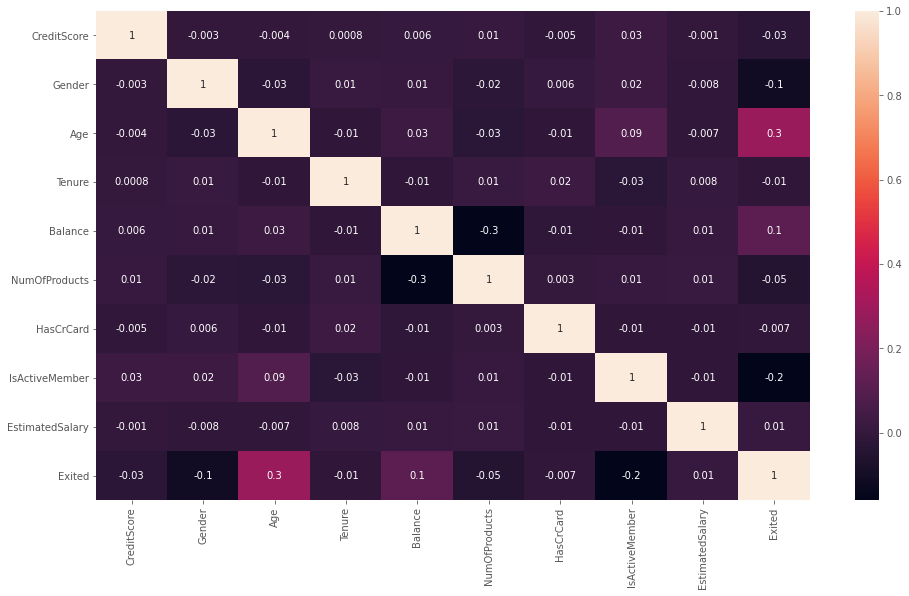

In [8]:
plt.style.use("ggplot")
f, ax = plt.subplots(figsize = (16, 9))
sns.heatmap(df.corr(), robust=True, fmt=".1g", annot=True)

#### Observation:
The following variables have a strong direct relation with *Exited*:
- Gender
- Age
- Balance
- IsActiveMember

Geography
France     3543
Germany    1791
Spain      1721
Name: HasCrCard, dtype: int64


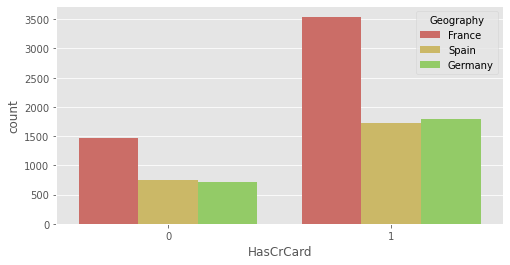

In [9]:
plt.figure(figsize = (8,4)) 
sns.countplot(x="HasCrCard",hue = "Geography", data=df, palette=sns.color_palette("hls", 8))
print(df["HasCrCard"].groupby(df["Geography"]).sum())

Exited
0    5631
1    1424
Name: HasCrCard, dtype: int64


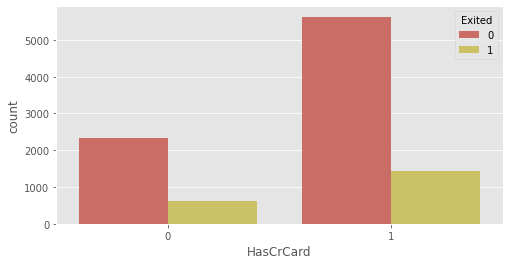

In [10]:
plt.figure(figsize = (8, 4))
sns.countplot(x="HasCrCard", hue="Exited", data=df, palette=sns.color_palette("hls", 7))
print(df["HasCrCard"].groupby(df["Exited"]).sum())

<Figure size 1008x576 with 0 Axes>

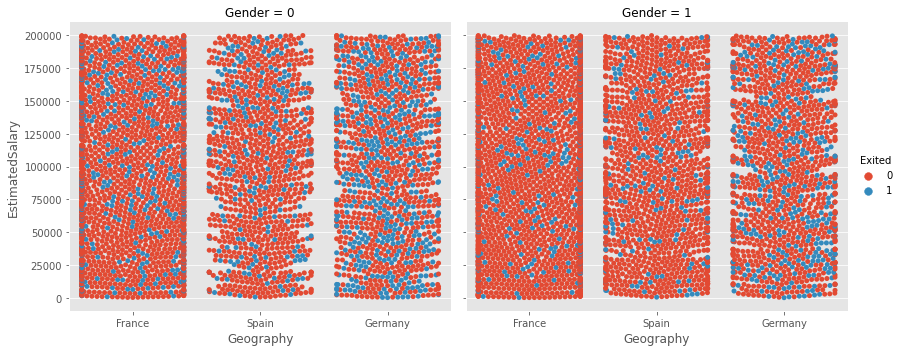

In [11]:
plt.figure(figsize = (14,8))
sns.catplot(x='Geography',
            y = "EstimatedSalary",
            hue="Exited",
            col="Gender",
            aspect=1.2,height=5,
            kind="swarm", data=df)
plt.show()            

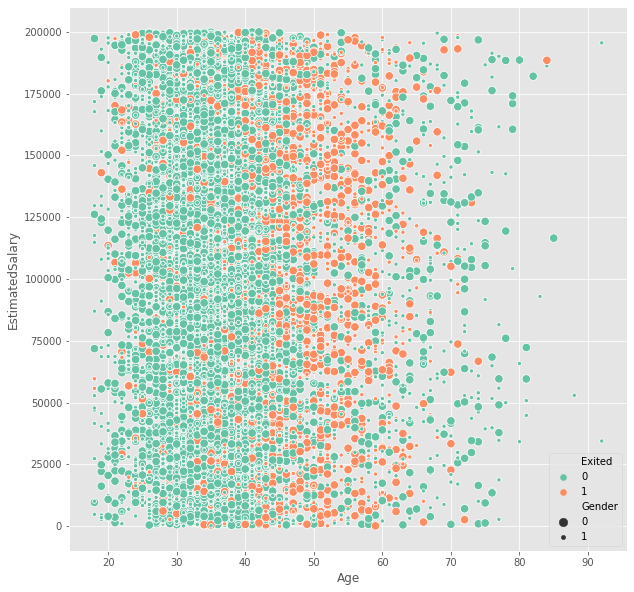

In [12]:
plt.figure(figsize=(10, 10))
ax = sns.scatterplot(x="Age", y="EstimatedSalary",
                     hue="Exited", size="Gender",
                     palette="Set2",
                     data=df)

#### Observation:
EstimatedSalary doesnt play an important role in deciding whether the person will leave or not

<Figure size 1008x576 with 0 Axes>

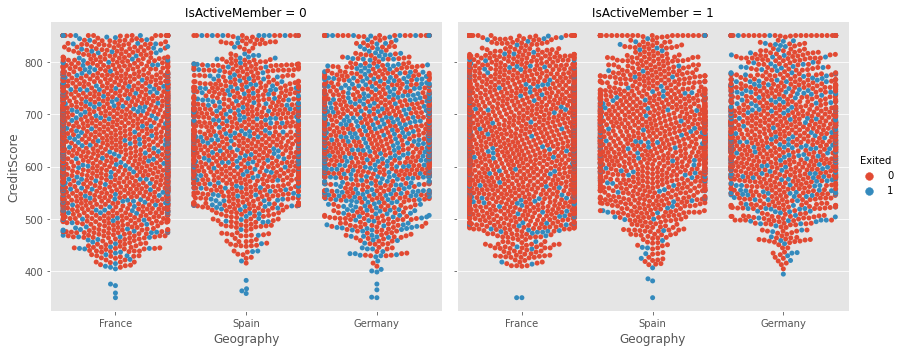

In [13]:
plt.figure(figsize = (14,8))
sns.catplot(x='Geography',
            y = "CreditScore",
            hue="Exited",
            col="IsActiveMember",
            aspect=1.2,height=5,
            kind="swarm", data=df)

#### Observation:
Germans having less credit score are most likely to leave the bank

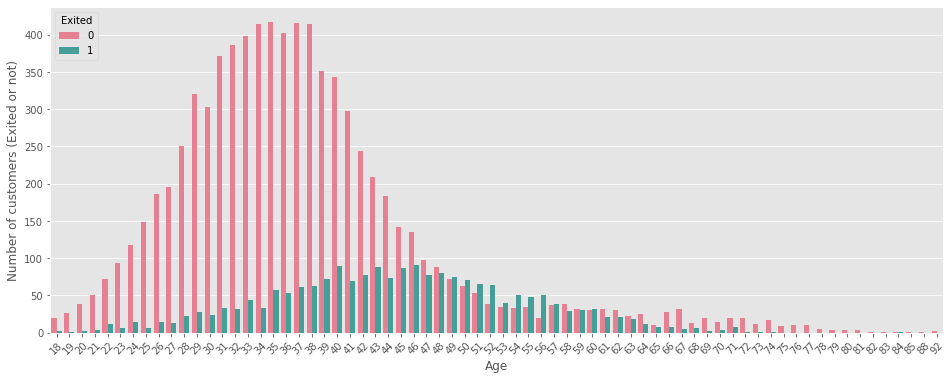

In [14]:
plt.figure(figsize = (16,6)) 
plt.xticks(rotation=45)
sns.countplot(x=df["Age"],hue = 'Exited',data=df, palette="husl");
plt.xlabel('Age')
plt.ylabel('Number of customers (Exited or not)');

In [15]:
df["Age_Category"] = pd.cut(df["Age"],
                            bins=[-np.inf, 30, 40, 50, 60, 74, np.inf],
                            labels=["young", "young-adult", "adult","elderly-adult", "old", "very-old"])

In [16]:
df["CreditScore"] = df["CreditScore"].apply(lambda x: 0 if x<450 else 1)

In [17]:
df["Geography"] = df["Geography"].map({"Germany":0, "Spain":1, "France":2})

In [18]:
df["Age_Category"] = df["Age_Category"].map({"young":0, "young-adult":1, "adult":2,"elderly-adult":3, "old":4, "very-old":5})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  int64   
 2   Gender           10000 non-null  int64   
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
 11  Age_Category     10000 non-null  category
dtypes: category(1), float64(2), int64(9)
memory usage: 869.5 KB


In [20]:
x = df.drop(["Exited"], axis="columns")
y = df["Exited"]

In [21]:
normalized = MinMaxScaler().fit(x)
x_norm = normalized.transform(x)

In [22]:
x_train, x_test, y_train, y_test=train_test_split(x_norm, y, test_size=0.1)

## K-Nearest Neighbours

### The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.

<img src="images/knn1.png">

Notice in the image above that most of the time, similar data points are close to each other. The KNN algorithm hinges on this assumption being true enough for the algorithm to be useful. KNN captures the idea of similarity (sometimes called distance, proximity, or closeness) with some mathematics we might have learned in our childhood— calculating the distance between points on a graph.

[Learn more about KNN](https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/)

In [23]:
knn_clf = KNeighborsClassifier(n_jobs=-1, n_neighbors=2)
knn_clf.fit(x_train, y_train)
knn_clf.score(x_test, y_test) * 100

82.19999999999999

## Decision Tree

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

<img src="images/dt1.jpg">

[Learn more about Decision Trees](https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb#:~:text=A%20decision%20tree%20is%20a%20flowchart%2Dlike%20structure%20in%20which,taken%20after%20computing%20all%20attributes)

In [25]:
dt_clf = DecisionTreeClassifier(max_depth=20, min_samples_split=190)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_test, y_test)*100

86.4

## Random Forest

Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes or mean prediction of the individual trees.
<img src="images/rf.png">

[Learn more about Random Forest](https://towardsdatascience.com/understanding-random-forest-58381e0602d2)

In [26]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=40)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test, y_test)*100

85.7

## Voting Classifier

A collection of several models working together on a single set is called an ensemble. The method is called Ensemble Learning. It is much more useful use all different models rather than any one.

Why ensembles?

- Lower error
- Less over-fitting
- Taste great

Voting is one of the simplest way of combining the predictions from multiple machine learning algorithms. Voting classifier isn’t an actual classifier but a wrapper for set of different ones that are trained and valuated in parallel in order to exploit the different peculiarities of each algorithm.

<img src="images/voting.png">

[Learn more about voting classifier](https://medium.com/@sanchitamangale12/voting-classifier-1be10db6d7a5)

In [27]:
classifiers = [("knn", knn_clf), ("svc", svc), ("dt", dt_clf), ("rf_clf", rf_clf)]
voting_clf = VotingClassifier(estimators=classifiers, voting="hard")
voting_clf.fit(x_train, y_train)
voting_clf.score(x_test, y_test)*100

86.4

There are many more classifiers out there for you to discover, but these were the most used ones.  
Find out more [here](https://scikit-learn.org/stable/)